# 0.0 Imports and Help Fuctions

In [1]:
import pandas as pd 
import inflection
import math
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image

## 0.1 Helper Fuctions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [4]:
df_sales_raw = pd.read_csv("datas/train.csv", low_memory = False)
df_store_raw = pd.read_csv("datas/store.csv", low_memory = False)
df_raw = pd.merge( df_sales_raw,df_store_raw, how="left", on = "Store" )

# 1.0 Descrição dos Dados

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list ( map(snakecase, cols_old ))

df1.columns = cols_new

In [7]:
cols_new

['store',
 'day_of_week',
 'date',
 'sales',
 'customers',
 'open',
 'promo',
 'state_holiday',
 'school_holiday',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'promo_interval']

## 1.2 Data Dimension

In [8]:
print(f"Number of rows {df1.shape[0]}")
print(f"Number of columns {df1.shape[1]}")

Number of rows 1017209
Number of columns 18


## 1.3 Data Types

In [9]:
df1["date"] = pd.to_datetime( df1["date"] )

In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Temos alguns dados faltantes em promo. e também em competition_distance

## 1.5 Fillout NA

In [12]:
#competition_distance   
df1["competition_distance"] = df1["competition_distance"].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month 
df1["competition_open_since_month"] = df1.apply( lambda x: x["date"].month if math.isnan(x["competition_open_since_month"]) 
                                                else x["competition_open_since_month"], axis=1)

#competition_open_since_year 
df1["competition_open_since_year"] = df1.apply( lambda x: x["date"].year if math.isnan(x["competition_open_since_year"]) 
                                                else x["competition_open_since_year"], axis=1)

#promo2_since_week   
df1["promo2_since_week"] = df1.apply( lambda x: x["date"].week if math.isnan(x["promo2_since_week"]) 
                                                else x["promo2_since_week"], axis=1)

#promo2_since_year 
df1["promo2_since_year"] = df1.apply( lambda x: x["date"].year if math.isnan(x["promo2_since_year"]) 
                                                else x["promo2_since_year"], axis=1)

#promo_interval                  
month_map = {1: "Jan", 2: "Fev", 3: "Mar",4: "Apr",5: "May",6: "Jun",7: "Jul",8: "Aug",9: "Sept", 10: "Oct", 11: "Nov", 12: "Dez"}

df1["promo_interval"].fillna(0,inplace=True)

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1) 

In [13]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types 

In [14]:
df1["competition_open_since_month"] = df1["competition_open_since_month"].astype( int64 )
df1["competition_open_since_year"] = df1["competition_open_since_year"].astype( int64 )

df1["promo2_since_week"] = df1["promo2_since_week"].astype( int )
df1["promo2_since_year"] = df1["promo2_since_year"].astype( int )

In [15]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical 

In [16]:
num_attributes = df1.select_dtypes( include = ["int64", "float64", "int32"])
cat_attributes = df1.select_dtypes( exclude = ["int64", "float64", "datetime64[ns]"])

### 1.7.1 Numerical Attributes

In [17]:
# central tendency - mean, median 
ct1 = pd.DataFrame(num_attributes.apply( np.mean   )).T
ct2 = pd.DataFrame(num_attributes.apply( np.median )).T


# dispersion - std, min, max, range, skew, kurtosis 
d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( min )).T
d3 = pd.DataFrame(num_attributes.apply( max )).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T


#concatenate 
m = pd.concat( [d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns= ["attributes","min", "max","range","mean","median","std","skew","kurtosis"]

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2 Categorical Attributes

With boxplot

In [18]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday         4
store_type            4
assortment            3
promo2_since_week    52
promo2_since_year     7
promo_interval        4
month_map            12
dtype: int64

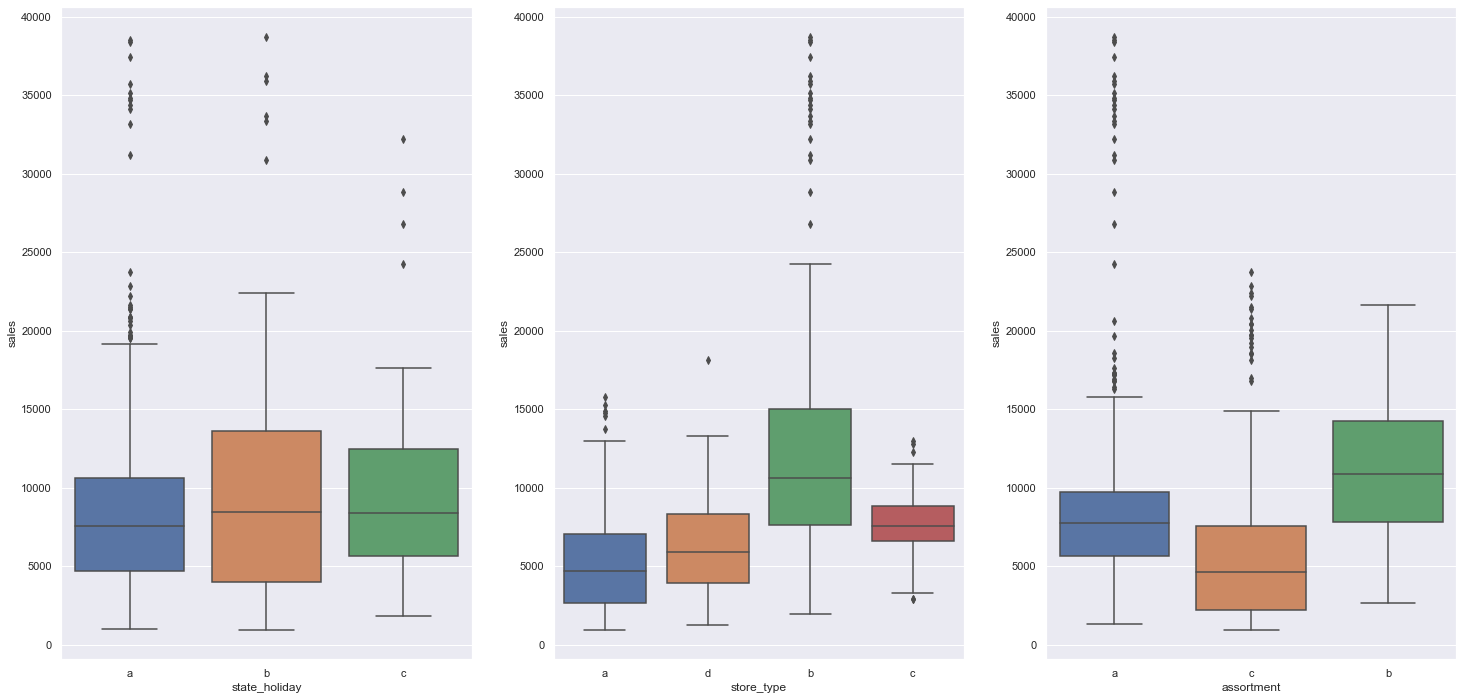

In [19]:
aux1 = df1[(df1["state_holiday"] !="0") & (df1["sales"] > 0)]

plt.subplot(1,3,1)
sns.boxplot(x="state_holiday", y="sales", data=aux1);

plt.subplot(1,3,2)
sns.boxplot( x="store_type" , y="sales", data=aux1);

plt.subplot(1,3,3)
sns.boxplot( x="assortment" , y="sales", data=aux1);

# 2.0 Feature Engineering

In [20]:
df2 = df1.copy()

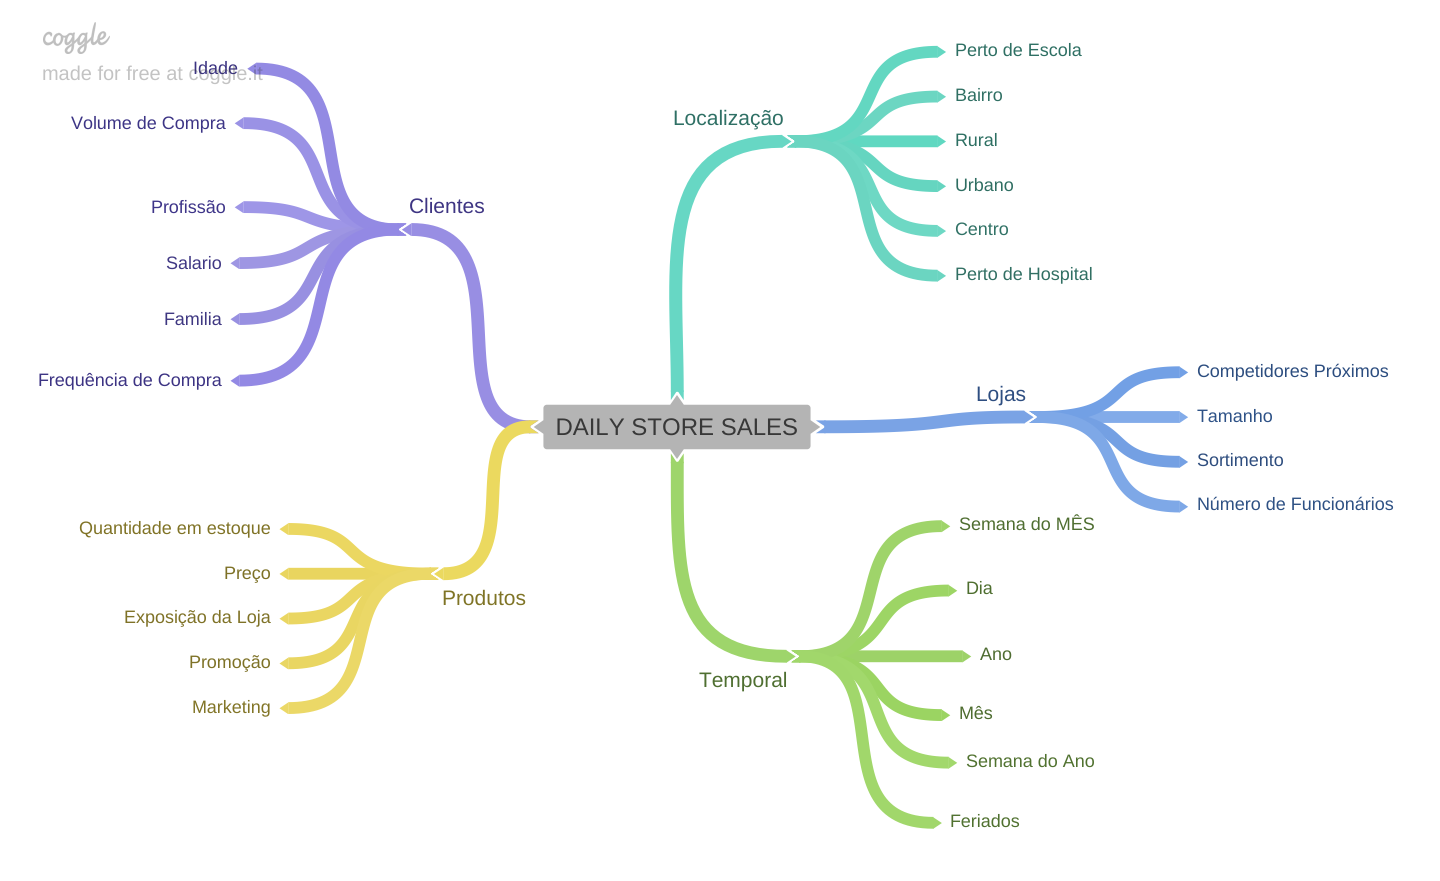

In [21]:
Image("datas/img/DAILY_STORE_SALES.png")

## 2.1 Criação de Hipóteses

**Hipoteses são somente uma correlação : Não é uma causa e efeito**

## 2.2 Hipóteses 

Não temos disponíveis todos os dataseets possíveis, por isso vamos filtrar algumas hipóteses que conseguimos solucionar com o que temos. 

CICLO 1 - CRISP

**PRIORIZAÇÃO DAS HIPÓTESES**

### 2.2.1 Hipóteses Lojas

**1.** Lojas com maior sortimento deveriam vender mais 

**2.** Lojas com competidores mais próximos deveriam vender menos 

**3.** Lojas com mais competidores a mais tempo deveriam vender mais  

### 2.2.2 Hipóteses Produto

**1.** Lojas com romoções ativas por mais tempo deveriam vender mais 

**2.** Lojas com mais dias de promoções deveriam vender mais 

**3.** Lojas com mais promoções consecutivas deveriam vender mais

### 2.2.3 Hipóteses Tempo 

**1.** Lojas que tem mais feriados deveriam vender menos. 


**2.** Lojas que abrem nos primeiros seis meses deveriam vender mais. 


**3.** Lojas que abrem nos finais de semana deveriam vender mais. 


**4.** Lojas com abertuda durante o Natal deveriam vender mais 


**5.** Lojas deveriam vender mais ao longo dos anos 


**6.** Lojas deveriam vender mais depois do dia 10 de todo mês 


**7.** Lojas deveriam vender menos durante os feriados escolares

## 2.3 Feature Engineering

In [22]:
# YEAR 
df2["year"] = df2["date"].dt.year

# MONTH 
df2["month"] = df2["date"].dt.month 

# DAY 
df2["day"] = df2["date"].dt.day 

# WEEK OF WEEK 
df2["week_of_week"] = df2["date"].dt.weekofyear 

# year week 
df2["year_week"] = df2["date"].dt.strftime( "%Y-%w" )

# COMPETITION SINCE 
df2['competition_since'] = df2.apply( lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30).apply( lambda x: x.days ).astype( int )


# PROMO SINCE 
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days ).astype( int )


#ASSORTMENT 
df2["assortment"] = df2["assortment"].apply( lambda x: "basic" if x == "a" else "extra" if x == "b" else "extended")

#STATE HOLIDAY 
df2["state_holiday"] = df2["state_holiday"].apply( lambda x: "public_holiday" if x == "a" else "easter_holiday" if x == "b" else "chistmas"  if x == "c" else "regular_day")

<ipython-input-22-c45662f82ba3>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2["week_of_week"] = df2["date"].dt.weekofyear


# 3.0 Filtragem de Variáveis 

In [23]:
df3 = df2.copy()

In [24]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_week,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-5,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-5,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-5,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-5,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-5,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das linhas

In [25]:
df3 = df3[(df3["open"] != 0) & (df3["sales"] > 0)]

## 3.2 Selação das colunas

In [26]:
df3.drop( ["customers","open", "promo_interval", "month_map"], axis=1, inplace=True)

# 4.0 Exploratory Analysis

In [27]:
df4 = df3.copy()

## 4.1 Análise Univariada 

### 4.1.1 Response Variable

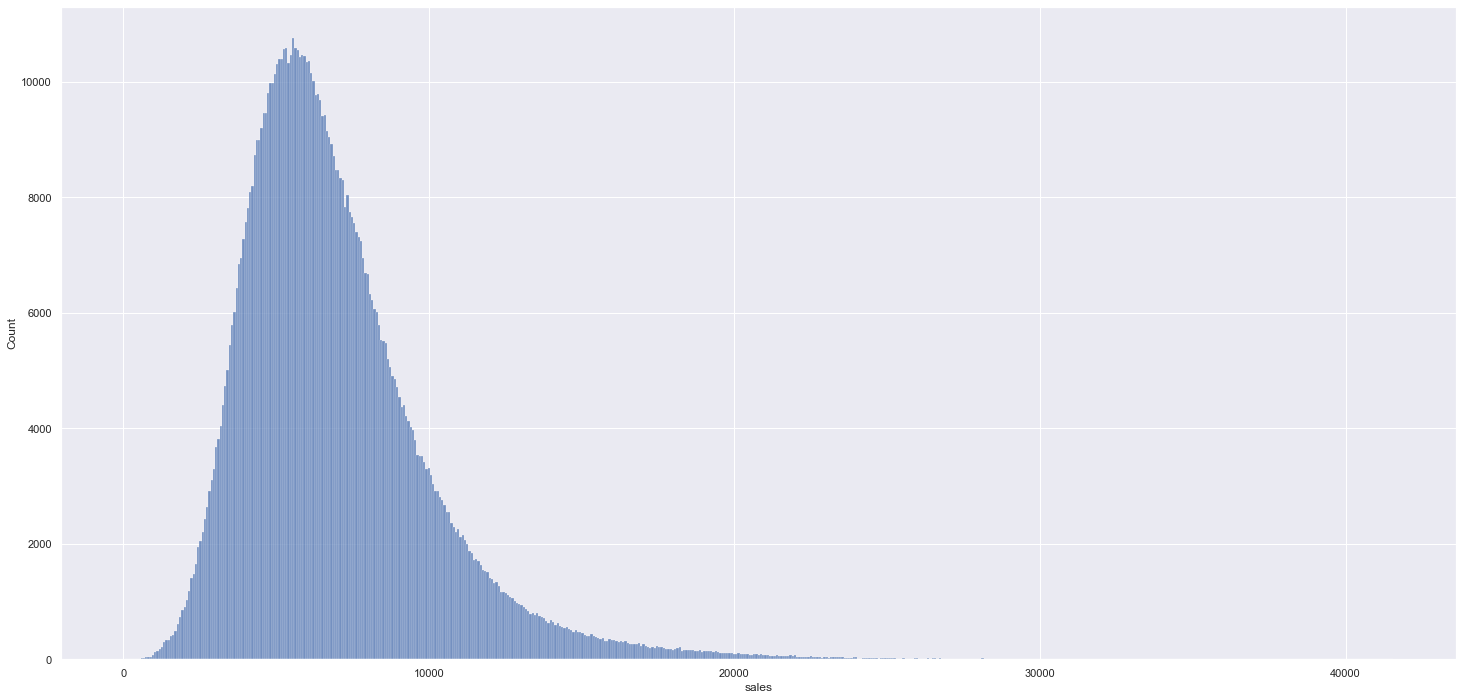

In [28]:
sns.histplot( df4["sales"]);

### 4.1.2 Numerical Variable

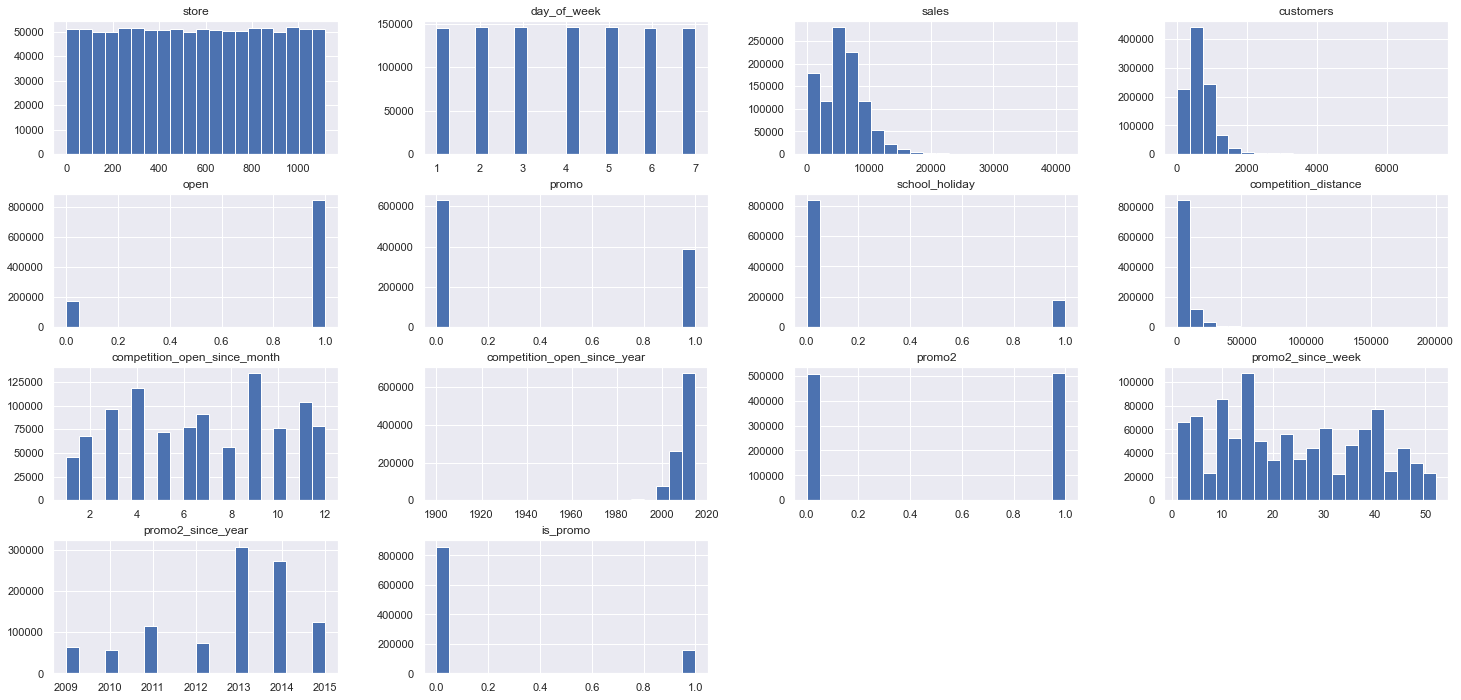

In [29]:
num_attributes.hist(bins = 20); 

### 4.1.3 Categorical Variable

In [30]:
df4["state_holiday"].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126          chistmas
Name: state_holiday, dtype: object

C:\Users\guisg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guisg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guisg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


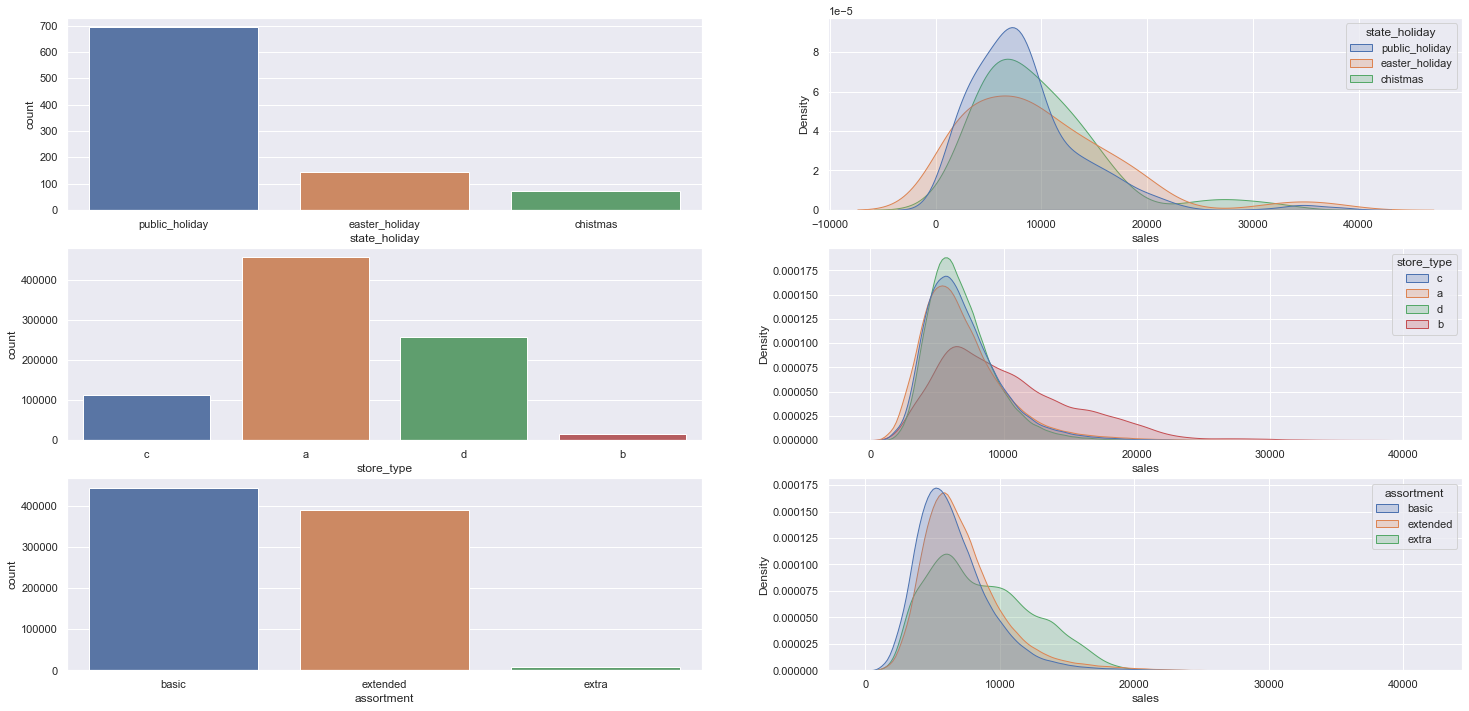

In [31]:
#state_holiday
plt.subplot(3,2,1)
a = df4[df4["state_holiday"] != "regular_day"]
sns.countplot( a["state_holiday"] )

plt.subplot(3,2,2)
sns.kdeplot(data = a, x= 'sales', hue ='state_holiday',fill = True, common_norm = False );


#store_type
plt.subplot(3,2,3)
sns.countplot( df4["store_type"] )
plt.subplot(3,2,4)
sns.kdeplot(data = df4, x= 'sales', hue = 'store_type',fill = True, common_norm = False );

#assortment
plt.subplot(3,2,5)
sns.countplot( df4["assortment"] )

plt.subplot(3,2,6)
sns.kdeplot(data = df4, x='sales', hue = 'assortment',fill = True, common_norm = False );

## 4.2 Análise Bivariada 

### **H1** Lojas com maior sortimento deveriam vender mais

**FALSA**

Lojas com maior sortimento vendem menos

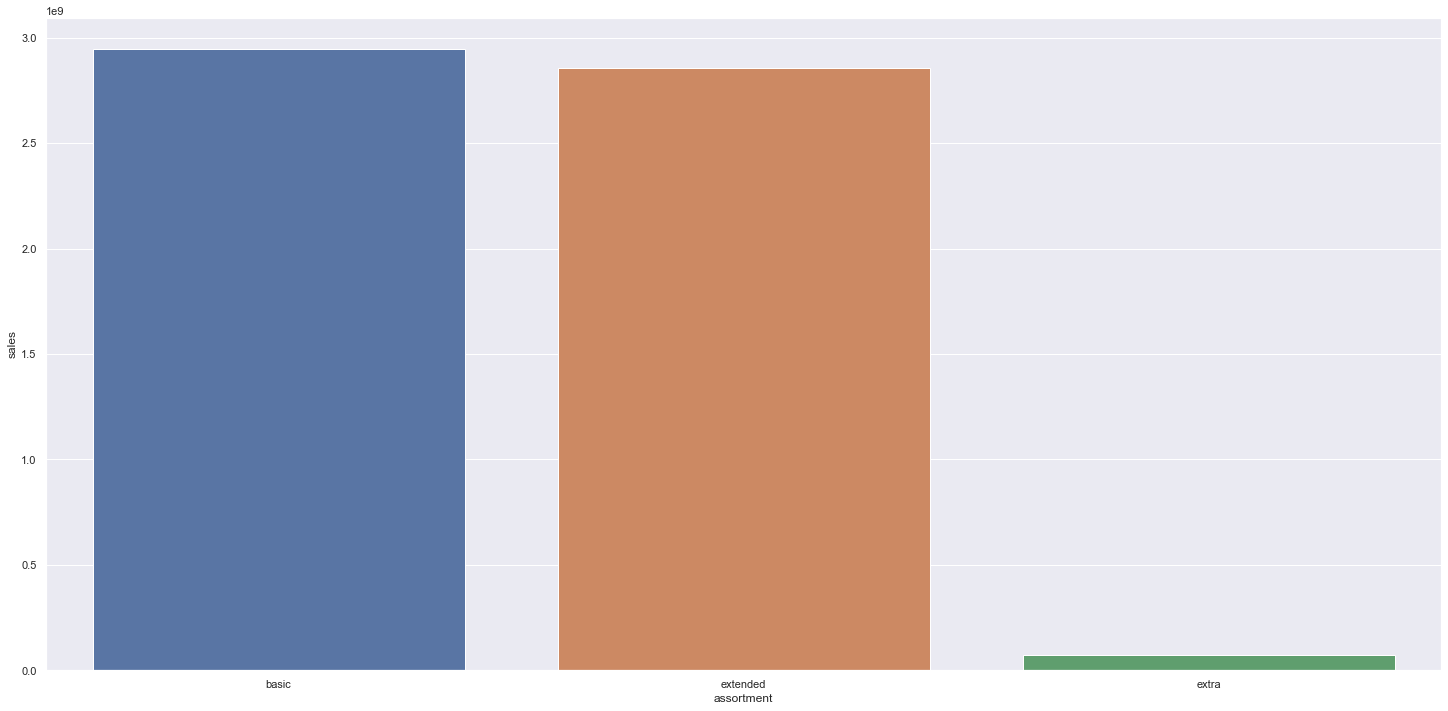

In [47]:
aux = df4[["assortment", "sales"]].groupby( "assortment" ).sum().reset_index()
sns.barplot( x="assortment", y="sales", data=aux);

Lojas com assortment extra vendem menos do que lojas com extended (médias).


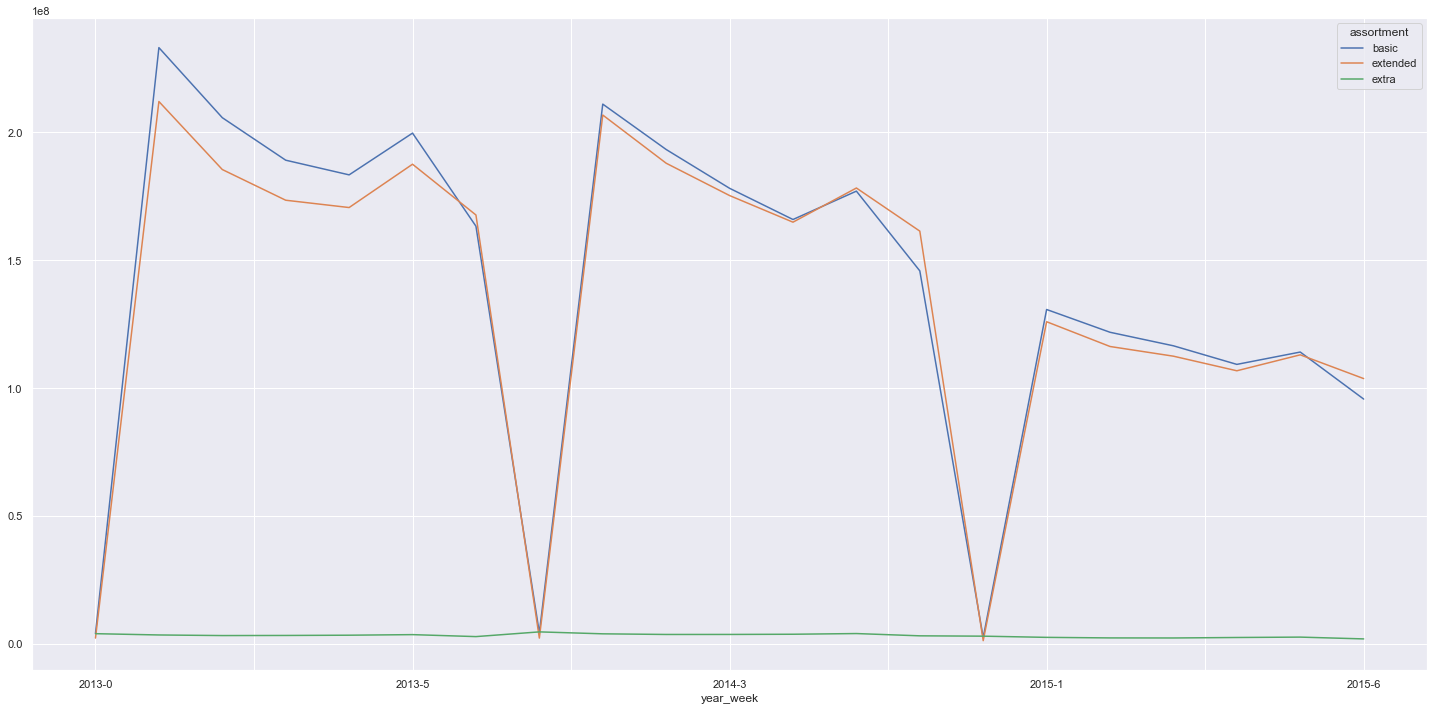

In [46]:
aux2 = df4[["year_week","assortment", "sales"]].groupby( ["year_week","assortment"] ).sum().reset_index()
aux3 = aux2.pivot( index="year_week", columns="assortment", values="sales").plot();

<AxesSubplot:xlabel='year_week'>

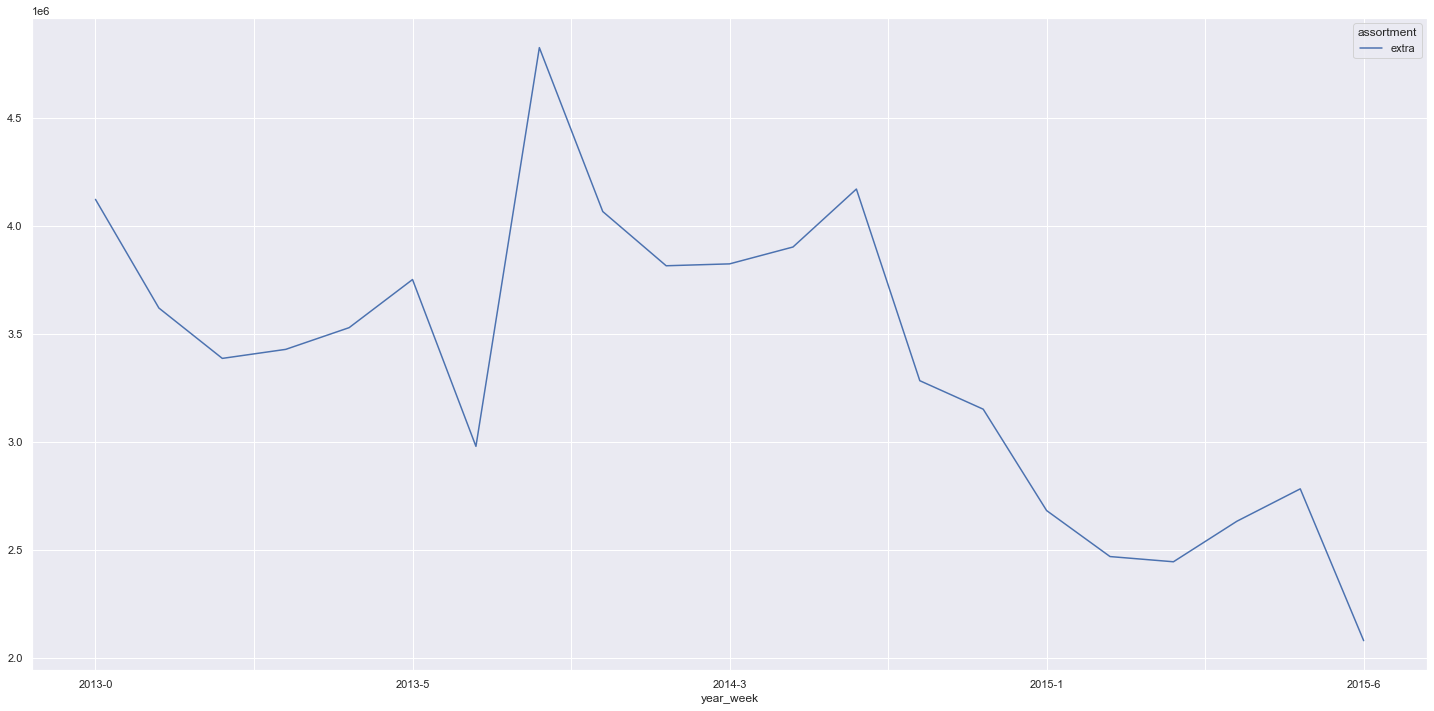

In [49]:
aux4 = aux2[aux2["assortment"]=="extra"]
aux4.pivot(index="year_week", columns="assortment", values="sales").plot()


### **H2** Lojas com competidores mais próximos deveriam vender menos. 

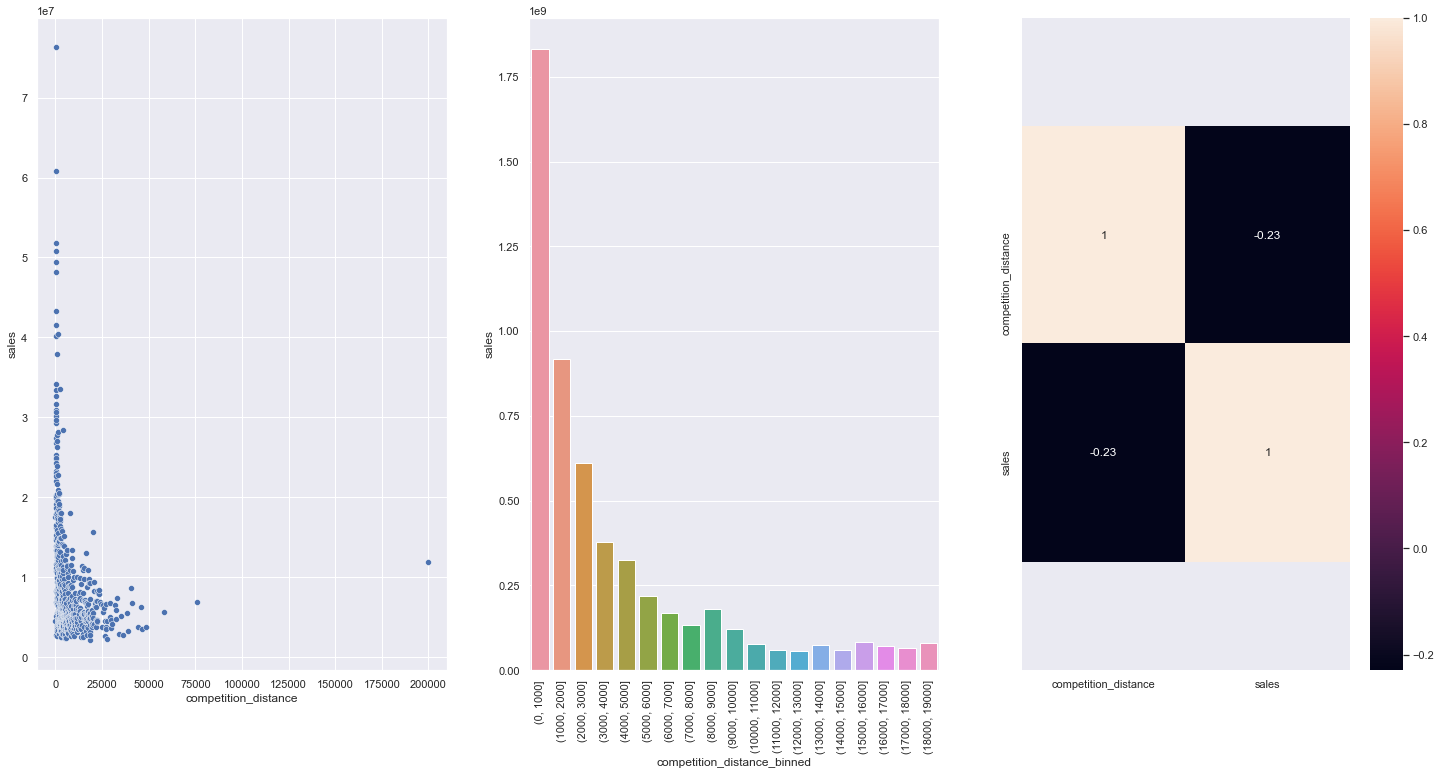

In [65]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );


plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'],bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned' ).sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

In [60]:
aux2.sample(4)

,year_week,assortment,sales
5,2013-1,extra,3619619
22,2014-0,extended,2401658
62,2015-6,extra,2080132
35,2014-4,extra,3902065


### **H3** Lojas com competidores à mais tempo deveriam vender mais. 

## 4.3 Análise Multivariada 